# Project 1 - Project Preparation Health insurance cost pediction
## Jiye Lyu, Jie Guo and Ting-Chun Liao

 [2.Objective of the Proposed Research](#jump1)

 [3.Data Exploration](#jump2)

 [4.Data cleaning](#jump3)

 [5.Adaption](#jump5)

 [6.Describe visualization](#jump6)

 [6.1 Visualization 1](#jump7)

 [6.2 Visualization 2](#jump8)

 [6.3 Visualization 3](#jump9)

 [6.4 Visualization 4](#jump10)

 [7. Explore correlations](#jump11)

 [8. Response Variable](#jump12)

 [9. Simple Liner Regression](#jump13)

 [10. Multiple Regression](#jump14)

 [11. Project Report](#jump15)

# Objective of the Proposed Research
 <span id="jump1"> </span>

Our stakeholder is a health insurance company. It consults us to make a prediction in personal medical insurance costs. The company gives us a data set that includes some basic information. We can get people's age, gender, BMI index, region, and charges. Besides, we can also know if he or she is a smoker and how many children does he or she has.
We think that we can make a module based on the least-square module to get a forecast. But first, we need to find which variables are valuable in this data set. Then we can add variables into the module to find which variable has potential value.
Finally, we can compare the least square error with each other to find the best fit module in this data set. So we can make a prediction on personal insurance costs by age, BMI and other variables.

In [1]:
data <- read.csv("insurance.csv")

# Data Exploration
 <span id="jump2">  </span>

## Show top 10 rows

In [2]:
head(data,n=10)

age,sex,bmi,children,smoker,region,charges
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622
46,female,33.440,1,no,southeast,8240.590
37,female,27.740,3,no,northwest,7281.506
37,male,29.830,2,no,northeast,6406.411
60,female,25.840,0,no,northwest,28923.137


## Show dimension

In [3]:
dim(data)

[1] 1338    7

## Show structure

In [4]:
str(data)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


## Show summary

In [5]:
summary(data)

      age            sex           bmi           children     smoker    
 Min.   :18.00   female:662   Min.   :15.96   Min.   :0.000   no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1st Qu.:0.000   yes: 274  
 Median :39.00                Median :30.40   Median :1.000             
 Mean   :39.21                Mean   :30.66   Mean   :1.095             
 3rd Qu.:51.00                3rd Qu.:34.69   3rd Qu.:2.000             
 Max.   :64.00                Max.   :53.13   Max.   :5.000             
       region       charges     
 northeast:324   Min.   : 1122  
 northwest:325   1st Qu.: 4740  
 southeast:364   Median : 9382  
 southwest:325   Mean   :13270  
                 3rd Qu.:16640  
                 Max.   :63770  

# Data Cleaning
 <span id="jump3">  </span>

We need the numeric value to make linear regression. So we think that we can delete the "Sex" and "Region" columns temporarily when we make the liner regression module. This data set called data_1.

In [6]:
data_1<- data.frame('Age'=data$age,'BMI'=data$bmi,'Children'=data$children,'Charges'=data$charges)
head(data_1,n=10)

Age,BMI,Children,Charges
19,27.900,0,16884.924
18,33.770,1,1725.552
28,33.000,3,4449.462
33,22.705,0,21984.471
32,28.880,0,3866.855
31,25.740,0,3756.622
46,33.440,1,8240.590
37,27.740,3,7281.506
37,29.830,2,6406.411
60,25.840,0,28923.137


# Adaptation
 <span id="jump5"> </span>

We decided to add four columns to the original data set called data :
 1. "Evaluated charge": It can be used to show the results that module products by the information in the row. We use rep(1,1338) temporarily to replace this column.
 
 
 2. "Average.charge.among.smoking.or.not": This column is the average of charges about smoking people and no smoking people. We use rep(1,1338) temporarily to replace this column.
 
 
 3. "Identity": This column can show what identity he or she is according to age. It could be a teenager(13-17), young people(18-45), middle-aged people(46-69), the aged(69+). We use rep(1,1338) temporarily to replace this column.
 
 
 4. "The average charge in different regions": This column can show the average charges in the specific region. We use rep(1,1338) temporarily to replace this column.
 
 
 5. "The average charge in different 'Identity'": This column can show the average charges in different "Identity".We use rep(1,1338) temporarily to replace this column.
 
 
 And the new data set is called data_2.

In [7]:
newcolumns <- data.frame('Evaluated.Charge'=rep(1,1338),"Average.charge.among.smoking.or.not"=rep(1,1338),"Identity"=rep(1,1338),
                        'The.average.charge.in.different.region'=rep(1,1338),'The.average.charge.in.different.Identity'=rep(1,1338))

data_2<-cbind(data,newcolumns)
head(data_2,n=10)

age,sex,bmi,children,smoker,region,charges,Evaluated.Charge,Average.charge.among.smoking.or.not,Identity,The.average.charge.in.different.region,The.average.charge.in.different.Identity
19,female,27.900,0,yes,southwest,16884.924,1,1,1,1,1
18,male,33.770,1,no,southeast,1725.552,1,1,1,1,1
28,male,33.000,3,no,southeast,4449.462,1,1,1,1,1
33,male,22.705,0,no,northwest,21984.471,1,1,1,1,1
32,male,28.880,0,no,northwest,3866.855,1,1,1,1,1
31,female,25.740,0,no,southeast,3756.622,1,1,1,1,1
46,female,33.440,1,no,southeast,8240.590,1,1,1,1,1
37,female,27.740,3,no,northwest,7281.506,1,1,1,1,1
37,male,29.830,2,no,northeast,6406.411,1,1,1,1,1
60,female,25.840,0,no,northwest,28923.137,1,1,1,1,1


## The following parts are used to create values in new columns.
### This part creates "Identity" column.

In [8]:
j=1
for (i in data_2$age){
    if (i<=45){
        data_2[j,10]<-"young people"  
        j=j+1
    }
    else if (i<=69){
        data_2[j,10]<-"middle-aged people"  
        j=j+1
    }
    else {
        data_2[j,10]<-"aged people"  
        j=j+1
    }
}

### This part creates "Average.charge.among.smoking.or.not" column.

Get the length of smoking people and no smoking people.

In [9]:
subset1 <- subset(data_2,smoker=="yes")
subset2 <- subset(data_2,smoker=="no")
dim(subset1)
dim(subset2)

[1] 274  12

[1] 1064   12

In [10]:
j=1
smoker_average_charger<- sum(subset1$charges)/274
nosmoker_average_charger<-sum(subset2$charges)/1064

for (i in data_2$smoker){
    if (i=='yes'){
        data_2[j,9]<-smoker_average_charger
        j=j+1
    }
    else {
        data_2[j,9]<-nosmoker_average_charger  
        j=j+1
    }
}


This is the top 5 rows of data set after adapting.

###  This part creates "The.average.charge.in.different.region" column.

In [11]:
table(data_2$region)


northeast northwest southeast southwest 
      324       325       364       325 

In [12]:
subset3 <- subset(data_2,region=="northeast")
subset4 <- subset(data_2,region=="northwest")
subset5 <- subset(data_2,region=="southeast")
subset6 <- subset(data_2,region=="southwest")
j=1
northeast_charge<-sum(subset3$charges)/324
northwest_charge<-sum(subset4$charges)/325
southeast_charge<-sum(subset5$charges)/364
southwest_charge<-sum(subset6$charges)/325

for (i in data_2$region){
    if (i=='northeast'){
        data_2[j,11]<-northeast_charge
        j=j+1
    }
    if (i=='northwest'){
        data_2[j,11]<-northwest_charge
        j=j+1
    }
    if (i=='southeast'){
        data_2[j,11]<-southeast_charge
        j=j+1
    }
    if (i=='southwest'){
        data_2[j,11]<-southwest_charge  
        j=j+1
    }
}


###  This part creates "The.average.charge.in.different.age.group" column.

In [13]:
table(data_2$Identity)


middle-aged people       young people 
               500                838 

In [14]:
summary(data_2$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   27.00   39.00   39.21   51.00   64.00 

In [15]:
subset7 <- subset(data_2,Identity=="middle-aged people")
subset8 <- subset(data_2,Identity=="young people")

middle_aged_people_charge<- sum(subset7$charges)/500
young_people_charge<-sum(subset8$charges)/838

j=1
for (i in data_2$age){
    if (i<=45){
        data_2[j,12]<-young_people_charge  
        j=j+1
    }
    else {
        data_2[j,12]<-middle_aged_people_charge  
        j=j+1
    }
}

In [16]:
head(data_2)

age,sex,bmi,children,smoker,region,charges,Evaluated.Charge,Average.charge.among.smoking.or.not,Identity,The.average.charge.in.different.region,The.average.charge.in.different.Identity
19,female,27.900,0,yes,southwest,16884.924,1,32050.232,young people,12346.94,10925.55
18,male,33.770,1,no,southeast,1725.552,1,8434.268,young people,14735.41,10925.55
28,male,33.000,3,no,southeast,4449.462,1,8434.268,young people,14735.41,10925.55
33,male,22.705,0,no,northwest,21984.471,1,8434.268,young people,12417.58,10925.55
32,male,28.880,0,no,northwest,3866.855,1,8434.268,young people,12417.58,10925.55
31,female,25.740,0,no,southeast,3756.622,1,8434.268,young people,14735.41,10925.55


# Describe visualization
 <span id="jump6"> </span>

In [17]:
library(plotly)
library(ggplot2)
library(psych)
library(rgl)
library(RColorBrewer)
library(corrplot)
library(MASS)
library(lattice)
library(reshape)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout


Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha

corrplot 0.84 loaded

Attaching package: 'MASS'

The following object is masked from 'package:plotly':

    select


Attaching package: 'reshape'

The following object is masked from 'package:plotly':

    rename



## Visualization 1
 <span id="jump7">  </span>

This part shows the "Age Attribution" in our data set according to "Identity" column.

In [18]:
table(data_2$Identity)


middle-aged people       young people 
               500                838 

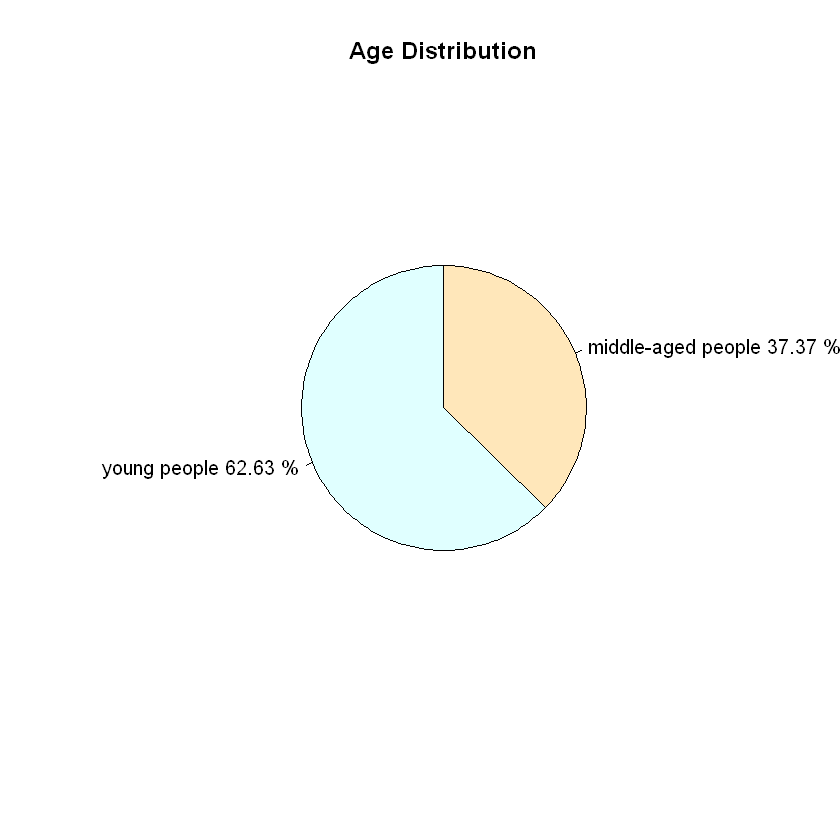

In [19]:
age_data = c(500,838)
pct = (age_data/sum(age_data))*100
pct = round(pct,2)
labels = c("middle-aged people","young people")
labels = paste(labels,pct, "%")
col = c("wheat1", "lightcyan")
pie(pct,col = col, radius = 0.5, init.angle = 90, clockwise = TRUE, 
    labels =labels, main = "Age Distribution")

## Visualization 2
 <span id="jump8">  </span>
This part shows the average charges in different regions.

In [20]:
table(data$region)
table(data_2$The.average.charge.in.different.region)


northeast northwest southeast southwest 
      324       325       364       325 


12346.9373772923 12417.5753739692 13406.3845163858 14735.4114376099 
             325              325              324              364 

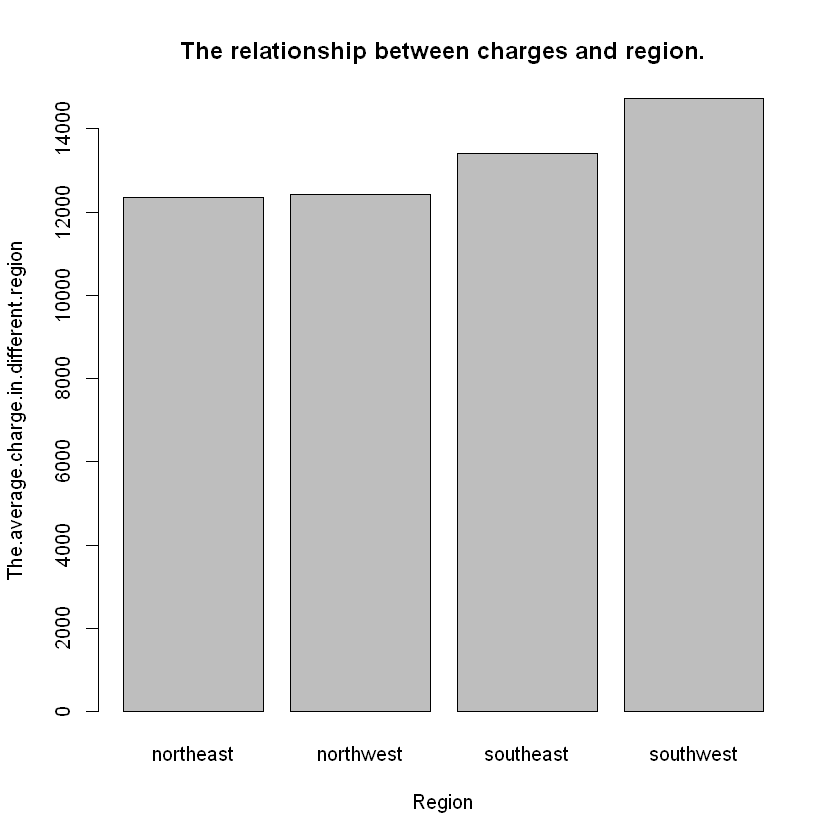

In [21]:
b<-round(c(12346.9373772923 ,12417.5753739692, 13406.3845163858, 14735.4114376099))
x=c('northeast','northwest','southeast','southwest')
y=b

barplot(y,names.arg=x,xlab="Region",ylab="The.average.charge.in.different.region ",main="The relationship between charges and region.")

## Visualization 3
 <span id="jump9">  </span>

This part shows the boxplot with the "Relationship between Smoking and Charges".

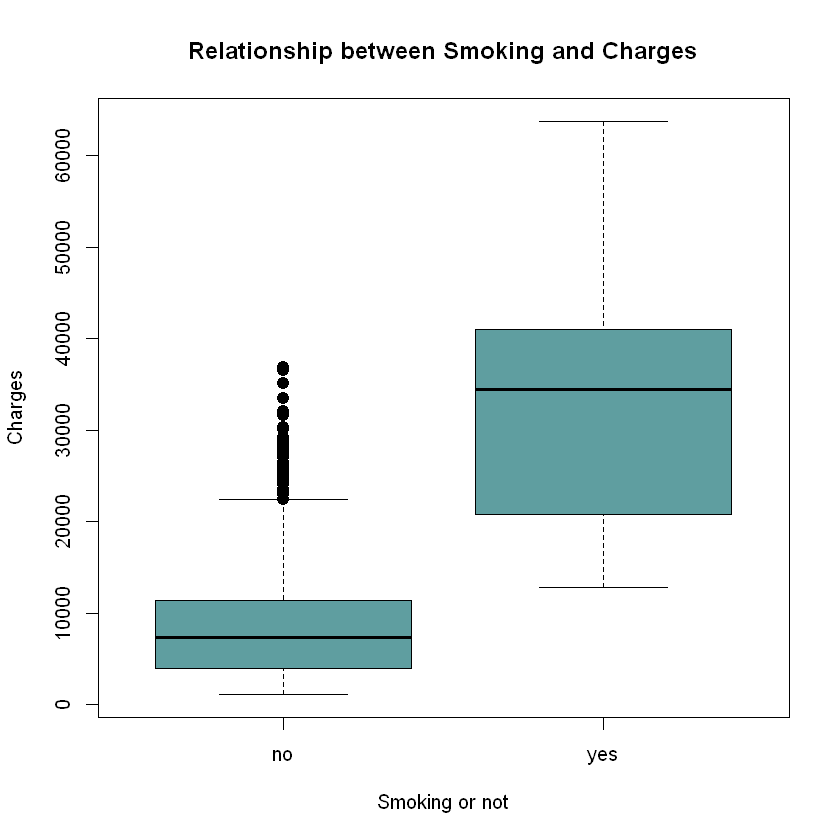

In [22]:
plot(data$charges~ data$smoker, col='cadetblue', pch=20, cex=2, 
     main="Relationship between Smoking and Charges", 
     xlab="Smoking or not", ylab="Charges")

## Visualization 4

 <span id="jump10">  </span>

This part shows the "Relationship between Age and Charges".

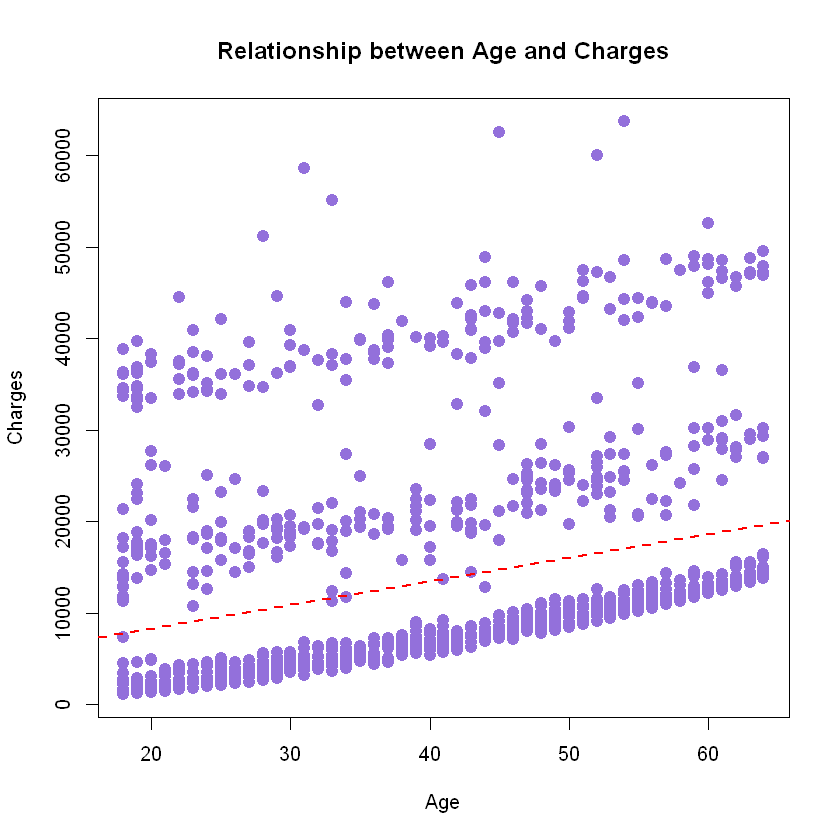

In [23]:
plot(data$charges~ data$age, col='mediumpurple', pch=20, cex=2, 
     main="Relationship between Age and Charges", 
     xlab="Age", ylab="Charges")
modline = lm(formula = charges ~ age, data = data)
abline(modline, col = 'red', lwd = 2, lty="dashed")

# Explore Correlations:
 <span id="jump11">  </span>


We showed the relationship between charges with age, smoking and region before. As the following, the first plot shows the relationship between charges and bmi. And the second plot shows the relationship between charges and children number. 

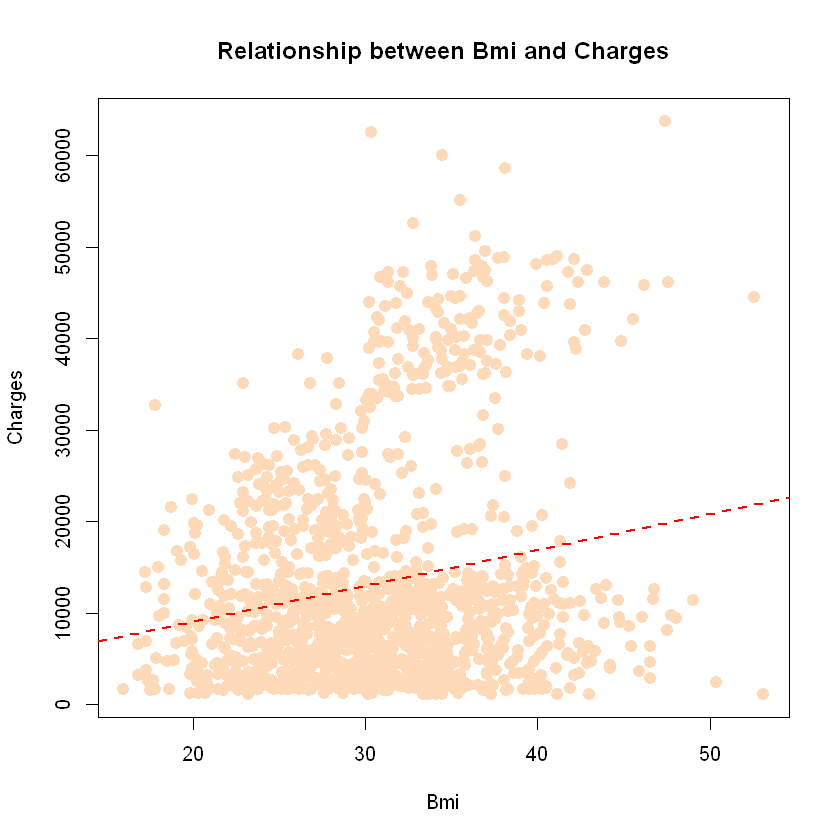

In [24]:
plot(data$charges~ data$bmi, col='peachpuff', pch=20, cex=2, 
     main="Relationship between Bmi and Charges", 
     xlab="Bmi", ylab="Charges")
modline2 = lm(formula = charges ~ bmi, data = data)
abline(modline2, col = 'red', lwd = 2, lty="dashed")

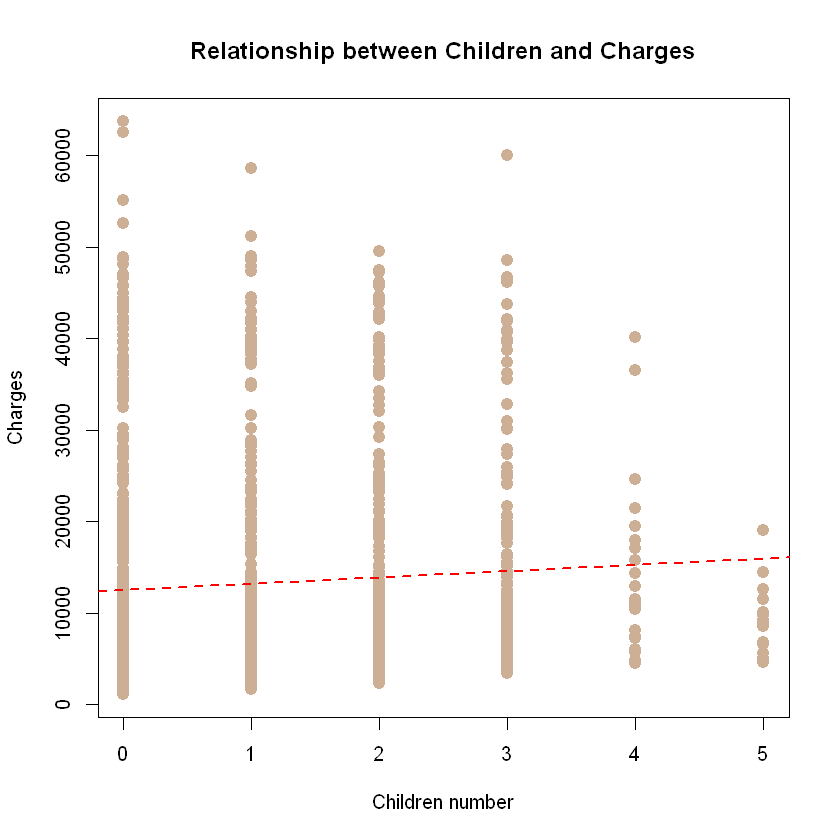

In [25]:
plot(data$charges~ data$children, col='peachpuff3', pch=20, cex=2, 
     main="Relationship between Children and Charges", 
     xlab="Children number", ylab="Charges")
modline3 = lm(formula = charges ~ children, data = data)
abline(modline3, col = 'red', lwd = 2, lty="dashed")

So we will use age, bmi, children number, smoking charge, region charge to make the liner regressions.

# Response Variable
 <span id="jump12">  </span>


I choose "charges" as the response variable. This column represents a people's cost in health insurance.I choose this column because the aim of our research is predicting the personal insurance costs. I hope I can find the prediction according to one person's basic information like age, bmi and other variables. So the health insurance company can give the client some suggestions when the client is consulting.

# Simple Linear Regression
 <span id="jump13">  </span>


In [26]:
head(data_2)

age,sex,bmi,children,smoker,region,charges,Evaluated.Charge,Average.charge.among.smoking.or.not,Identity,The.average.charge.in.different.region,The.average.charge.in.different.Identity
19,female,27.900,0,yes,southwest,16884.924,1,32050.232,young people,12346.94,10925.55
18,male,33.770,1,no,southeast,1725.552,1,8434.268,young people,14735.41,10925.55
28,male,33.000,3,no,southeast,4449.462,1,8434.268,young people,14735.41,10925.55
33,male,22.705,0,no,northwest,21984.471,1,8434.268,young people,12417.58,10925.55
32,male,28.880,0,no,northwest,3866.855,1,8434.268,young people,12417.58,10925.55
31,female,25.740,0,no,southeast,3756.622,1,8434.268,young people,14735.41,10925.55


## "How well can age predict charges?"

In [27]:
mod1 = lm(formula = charges ~ age, data = data_2)
summary(mod1)


Call:
lm(formula = charges ~ age, data = data_2)

Residuals:
   Min     1Q Median     3Q    Max 
 -8059  -6671  -5939   5440  47829 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3165.9      937.1   3.378 0.000751 ***
age            257.7       22.5  11.453  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11560 on 1336 degrees of freedom
Multiple R-squared:  0.08941,	Adjusted R-squared:  0.08872 
F-statistic: 131.2 on 1 and 1336 DF,  p-value: < 2.2e-16


Y = 257.7 * X + 3165.9

The responsible variable Y will increase 257.7 when explanatory increaase one.

## "How well can bmi predict charges?"

In [28]:
mod2 = lm(formula = charges ~ bmi, data = data_2)
summary(mod2)


Call:
lm(formula = charges ~ bmi, data = data_2)

Residuals:
   Min     1Q Median     3Q    Max 
-20956  -8118  -3757   4722  49442 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1192.94    1664.80   0.717    0.474    
bmi           393.87      53.25   7.397 2.46e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11870 on 1336 degrees of freedom
Multiple R-squared:  0.03934,	Adjusted R-squared:  0.03862 
F-statistic: 54.71 on 1 and 1336 DF,  p-value: 2.459e-13


Y = 393.87 * X + 1192.94

The responsible variable Y will increase 393.87 when explanatory increaase one.

## "How well can children predict charges?"

In [29]:
mod3 = lm(formula = charges ~ children, data = data_2)
summary(mod3)


Call:
lm(formula = charges ~ children, data = data_2)

Residuals:
   Min     1Q Median     3Q    Max 
-11585  -8759  -4071   3468  51248 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  12522.5      446.5  28.049   <2e-16 ***
children       683.1      274.2   2.491   0.0129 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12090 on 1336 degrees of freedom
Multiple R-squared:  0.004624,	Adjusted R-squared:  0.003879 
F-statistic: 6.206 on 1 and 1336 DF,  p-value: 0.01285


Y = 393.9 * X + 1192.9

The responsible variable Y will increase 393.9 when explanatory increaase one.

## "How well can 'Average.charge.among.smoking.or.not' predict charges?"

In [30]:
mod4 = lm(formula = charges ~ Average.charge.among.smoking.or.not, data = data_2)
summary(mod4)


Call:
lm(formula = charges ~ Average.charge.among.smoking.or.not, data = data_2)

Residuals:
   Min     1Q Median     3Q    Max 
-19221  -5042   -919   3705  31720 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -2.705e-11  3.501e+02    0.00        1    
Average.charge.among.smoking.or.not  1.000e+00  2.143e-02   46.66   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7470 on 1336 degrees of freedom
Multiple R-squared:  0.6198,	Adjusted R-squared:  0.6195 
F-statistic:  2178 on 1 and 1336 DF,  p-value: < 2.2e-16


Y = 683.1 * X + 12522.5

The responsible variable Y will increase 683.1 when explanatory increaase one.

## "How well can 'The.average.charge.in.different.region' predict charges?"

In [31]:
mod5 = lm(formula = charges ~ The.average.charge.in.different.region, data = data_2)
summary(mod5)


Call:
lm(formula = charges ~ The.average.charge.in.different.region, 
    data = data_2)

Residuals:
   Min     1Q Median     3Q    Max 
-13614  -8463  -3793   3385  49035 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                            -1.910e-11  4.455e+03   0.000  1.00000
The.average.charge.in.different.region  1.000e+00  3.348e-01   2.987  0.00287
                                         
(Intercept)                              
The.average.charge.in.different.region **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12070 on 1336 degrees of freedom
Multiple R-squared:  0.006634,	Adjusted R-squared:  0.00589 
F-statistic: 8.922 on 1 and 1336 DF,  p-value: 0.002869


Y = 0.345 * X + 8790.074

The responsible variable Y will increase 0.345 when explanatory increaase one.

# Multiple Linear Regression
 <span id="jump14">  </span>


## This multiple regression contains three explantories: Age, bmi and Average.charge.among.smoking.or.not.

In [32]:
reg1 <- lm(charges ~ age + bmi + Average.charge.among.smoking.or.not, data = data_2)
summary(reg1)


Call:
lm(formula = charges ~ age + bmi + Average.charge.among.smoking.or.not, 
    data = data_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-12415.4  -2970.9   -980.5   1480.0  28971.8 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -2.019e+04  9.631e+02  -20.96   <2e-16 ***
age                                  2.595e+02  1.193e+01   21.75   <2e-16 ***
bmi                                  3.226e+02  2.749e+01   11.74   <2e-16 ***
Average.charge.among.smoking.or.not  1.009e+00  1.748e-02   57.70   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6092 on 1334 degrees of freedom
Multiple R-squared:  0.7475,	Adjusted R-squared:  0.7469 
F-statistic:  1316 on 3 and 1334 DF,  p-value: < 2.2e-16


## This multiple regression contains four explantories: Age, bmi , 'smoking charge' and 'region charge'.

In [33]:
reg2 <- lm(charges ~ age + bmi + Average.charge.among.smoking.or.not + The.average.charge.in.different.region, data = data_2)
summary(reg2)


Call:
lm(formula = charges ~ age + bmi + Average.charge.among.smoking.or.not + 
    The.average.charge.in.different.region, data = data_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-12501.4  -3029.5   -985.2   1483.2  29150.2 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                            -1.858e+04  2.321e+03  -8.006 2.57e-15
age                                     2.592e+02  1.194e+01  21.705  < 2e-16
bmi                                     3.275e+02  2.822e+01  11.603  < 2e-16
Average.charge.among.smoking.or.not     1.010e+00  1.753e-02  57.591  < 2e-16
The.average.charge.in.different.region -1.322e-01  1.739e-01  -0.760    0.447
                                          
(Intercept)                            ***
age                                    ***
bmi                                    ***
Average.charge.among.smoking.or.not    ***
The.average.charge.in.different.region    
---
Signif. cod

In [34]:
j=1
for (i in data_2$Evaluated.Charge){
        data_2[j,8]<- -20185.285 + 259.547 * data_2$age[j] + 322.615 * data_2$bmi[j] + 1.009 * data_2$ Average.charge.among.smoking.or.not[j] 
        j=j+1

}
head(data_2)

age,sex,bmi,children,smoker,region,charges,Evaluated.Charge,Average.charge.among.smoking.or.not,Identity,The.average.charge.in.different.region,The.average.charge.in.different.Identity
19,female,27.900,0,yes,southwest,16884.924,26085.750,32050.232,young people,12346.94,10925.55
18,male,33.770,1,no,southeast,1725.552,3891.446,8434.268,young people,14735.41,10925.55
28,male,33.000,3,no,southeast,4449.462,6238.503,8434.268,young people,14735.41,10925.55
33,male,22.705,0,no,northwest,21984.471,4214.916,8434.268,young people,12417.58,10925.55
32,male,28.880,0,no,northwest,3866.855,5947.517,8434.268,young people,12417.58,10925.55
31,female,25.740,0,no,southeast,3756.622,4674.959,8434.268,young people,14735.41,10925.55


According to the two summaries, it is obvious that the first one has a better effect on prediction.

Y = -20185.285 + 259.547 * X1 + 322.615 * X2 + 1.009 * X3

X1: age

X2: bmi

X3: Average.charge.among.smoking.or.not

# Project Report
 <span id="jump15">  </span>

We found that data give us information first, young people are more than middle-age people. 

Second, we can know a different region of people average the southwest have more people. 


Third, made smoking or not smoking plot. 


Fourth, we made a plot to show the Age and Charge relationship. 


Fifth, we can add variables into the module to find which variable has potential value. Then we choose "charges" as the response variable. because the aim of our research is to predict personal insurance costs. I hope I can find the prediction according to one person's basic information like age, BMI, and other variables. 

Sixth, we got a simple Linear Regression and multiple regression.

Seventh, above the data we found the three important variables is Age, BMI, and smoking, or not smoking.
 
Finally, we found summary1 multiple regression is better. 

In summary1 multiple regression linear have included a smoking variable so we can know this problem is important not only young people but middle-age, we can make so advertisement to let people know smoking will lead to health problems.

According to the multiple regression we can come to the conclusion that health insurance cost will be higher with the age increased. So do exercise, decrease bmi, and stop smoking is a better way to reduce one's health insurance cost.